# Load Documents

In [1]:
from pipeline.doc_load.document_loader import multi_xscience_get_text

train, test, val = multi_xscience_get_text()

In [2]:
import re

def split_sentences(text, result_list=[], sep = "."):
    # Split the text into sentences using a simple regex
    # sentences = re.split(r'(?<!\w\.\w.)(?<![A-Z][a-z]\.)(?<=\.|\?)\s', text)
    sentences = text.split(sep)
    
    # Initialize variables for tracking the current sentence and the result list
    current_sentence = ''

    # Iterate through the sentences
    for sentence in sentences:
        if sentence == "":
            continue
        # If adding the current sentence exceeds the word limit, start a new sentence
        if len(current_sentence.split()) + len(sentence.split()) > 500:
            result_list.append(current_sentence.strip())
            current_sentence = sentence
        else:
            # Otherwise, continue building the current sentence
            result_list.append(sentence)

    # Add the last sentence to the result list
    if current_sentence:
        result_list.append(current_sentence.strip())

    for s in sentences:
        if len(s.split()) > 500: 
            print(s)
    return result_list




In [3]:
sentences = []

for item in train[0][:20]:
    temp_list = split_sentences(item["abstract"])
    for doc in item["ref_abstract"]:
        temp_list = split_sentences(item["ref_abstract"][doc]["abstract"], temp_list)
    # sentences.append(temp_list)
    sentences.extend(temp_list)
    # sentences = temp_list

    # sentences.append(item["ref_abstract"].values().extend(item["abstract"]))

sentences

['Author(s): Kuperberg, Greg; Thurston, Dylan P',
 ' | Abstract: We give a purely topological definition of the perturbative quantum invariants of links and 3-manifolds associated with Chern-Simons field theory',
 ' Our definition is as close as possible to one given by Kontsevich',
 ' We will also establish some basic properties of these invariants, in particular that they are universally finite type with respect to algebraically split surgery and with respect to Torelli surgery',
 ' Torelli surgery is a mutual generalization of blink surgery of Garoufalidis and Levine and clasper surgery of Habiro',
 'This note is a sequel to our earlier paper of the same title [4] and describes invariants of rational homology 3-spheres associated to acyclic orthogonal local systems',
 ' Our work is in the spirit of the Axelrod–Singer papers [1], generalizes some of their results, and furnishes a new setting for the purely topological implications of their work',
 'Recently, Mullins calculated the Ca

# Create Topic Model and process sentences

In [4]:
from pipeline.topic_model.k_means_llm import TopicModel
from pipeline.embeddings.basic_embeddings import Embedding
import pandas as pd


tm = TopicModel()
embed_model = Embedding()


In [5]:
embeddings = embed_model.encode_many(sentences)
embeddings_df = pd.DataFrame(embeddings)


Batches:   0%|          | 0/123 [00:00<?, ?it/s]

# Get Topics

Optimal number of topics 7


/home/joramas/miniconda/envs/thesis/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/joramas/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were fou

> <generator object LLM.generate at 0x7fbedbee02e0>
> <generator object LLM.generate at 0x7fbedbee0190>
> <generator object LLM.generate at 0x7fbf05a9dd20>
> <generator object LLM.generate at 0x7fbf05a9e8f0>
> <generator object LLM.generate at 0x7fbf05a9ea40>
> <generator object LLM.generate at 0x7fbf05a9ece0>
> <generator object LLM.generate at 0x7fbf05a9ee30>


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

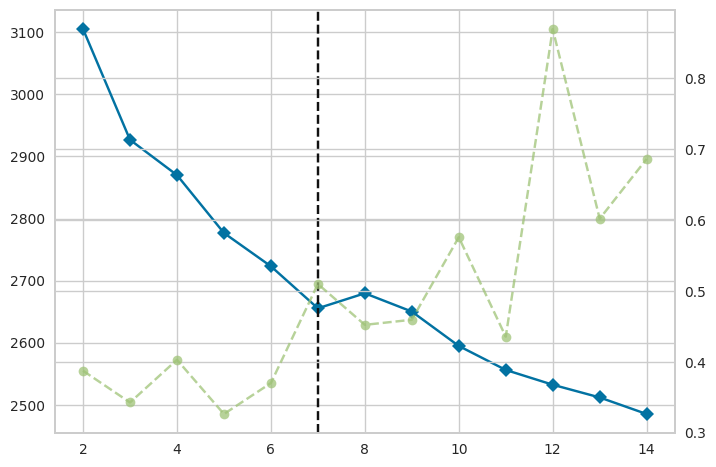

In [6]:
topics = tm.get_topics(sentences, embeddings_df)

In [7]:
for t in topics:
    print(f"{t}:{topics[t]}" )

0:([('The', 139), ('code', 104), ('We', 87), ('This', 45), ('branes', 42), ('also', 37), ('aspects', 37), ('string', 36), ('extremal', 36), ('optimization', 35), ('program', 34), ('performance', 33), ('solutions', 33), ('Java', 32), ('In', 31), ('theory', 31), ('different', 30), ('D', 30), ('system', 29), ('Our', 29)], <generator object LLM.generate at 0x7fbedbee02e0>)
1:([('The', 105), ('We', 77), ('string', 48), ('extremal', 43), ('theory', 42), ('surgery', 35), ('code', 35), ('branes', 34), ('results', 33), ('This', 30), ('Our', 28), ('dynamics', 27), ('Abstract', 25), ('type', 24), ('use', 24), ('black', 24), ('algebra', 23), ('Java', 23), ('also', 21), ('open', 20)], <generator object LLM.generate at 0x7fbedbee0190>)
2:([('code', 171), ('The', 123), ('This', 81), ('performance', 77), ('We', 72), ('paper', 67), ('data', 67), ('optimization', 62), ('system', 59), ('Java', 57), ('also', 55), ('program', 54), ('information', 49), ('results', 47), ('In', 46), ('technique', 44), ('Our',

# Store Data in Database

In [8]:
from pipeline.database.chroma_db import ChromaHandler
import uuid

db = ChromaHandler()
colection = db.create_collection(name="test_pipeline")
print("Inserting documents", len(embeddings))
db.add_embedding_to_database(colection, embeddings=embeddings.tolist(), documents=sentences, metadatas=[None] * len(embeddings))

Inserting documents 3933
[]
[1.6151376962661743]
[1.4739012718200684]
[1.2839536666870117]
[1.046289324760437]
[0.9429081678390503]
[1.1417970657348633]
[0.8901928663253784]
Similar embedding found. Skipping addition.
[1.763312816619873]
[0.9741219282150269]
[0.0]
Similar embedding found. Skipping addition.
[0.0]
Similar embedding found. Skipping addition.
[0.0]
Similar embedding found. Skipping addition.
[0.0]
Similar embedding found. Skipping addition.
[0.0]
Similar embedding found. Skipping addition.
[0.0]
Similar embedding found. Skipping addition.
[0.0]
Similar embedding found. Skipping addition.
[0.710375964641571]
Similar embedding found. Skipping addition.
[0.0]
Similar embedding found. Skipping addition.
[0.0]
Similar embedding found. Skipping addition.
[1.824044942855835]
[0.9626224040985107]
[0.7035991549491882]
Similar embedding found. Skipping addition.
[1.2244163751602173]
[1.2421233654022217]
[0.8729491233825684]
Similar embedding found. Skipping addition.
[1.10543215274

[3.2178841297310357e-13]
Similar embedding found. Skipping addition.
[0.0]
Similar embedding found. Skipping addition.
[0.0]
Similar embedding found. Skipping addition.
[0.87589430809021]
Similar embedding found. Skipping addition.
[0.0]
Similar embedding found. Skipping addition.
[0.0]
Similar embedding found. Skipping addition.
[0.0]
Similar embedding found. Skipping addition.
[0.581231951713562]
Similar embedding found. Skipping addition.
[0.0]
Similar embedding found. Skipping addition.
[2.1128269218819579e-13]
Similar embedding found. Skipping addition.
[0.8678113222122192]
Similar embedding found. Skipping addition.
[2.8397740430875784e-13]
Similar embedding found. Skipping addition.
[0.847923755645752]
Similar embedding found. Skipping addition.
[0.0]
Similar embedding found. Skipping addition.
[0.0]
Similar embedding found. Skipping addition.
[0.7491654753684998]
Similar embedding found. Skipping addition.
[0.0]
Similar embedding found. Skipping addition.
[0.0]
Similar embeddin

# Detect Relevant information for the topics

In [9]:
# from langchain.vectorstores import Chroma

# langchain_db = Chroma(client=db.client)
centroids = tm.clusters_centroids.tolist()

top_docs = []
for c in centroids:
    docs = db.query_embeddings(colection, query_embeddings=c, top_k=100)["documents"]
    # docs = langchain_db.max_marginal_relevance_search_by_vector(embedding=c, k=10)
    print(docs)
    top_docs.append(docs)


[['The Smalltalk-80* programming language includes dynamic storage allocation, full upward funargs, and universally polymorphic procedures; the Smalltalk-80 programming system features interactive execution with incremental compilation, and implementation portability', ' Recently we wanted to develop a hybrid of the two, that would let us experiment with both optimization and instrumentation on a standard workstation, preferably without requiring us to modify the normal compilers and linker', ' These features of modern programming systems are among the most difficult to implement efficiently, even individually', ' The system was implemented and tested with programs having different behavioral characteristics', ' With better performance yet good interactive behavior, these techniques reconcile exploratory programming, ubiquitous abstraction, and high performance', ' Four new techniques work together to achieve this: - Type feedback achieves high performance by allowing the compiler to i

In [10]:
# from ctransformers import AutoModelForCausalLM

# # Set gpu_layers to the number of layers to offload to GPU. Set to 0 if no GPU acceleration is available on your system.
# llm = AutoModelForCausalLM.from_pretrained(
#     "models/mistral-7b-instruct-v0.1.Q5_K_M.gguf", 
    
#     model_file="models/mistral-7b-instruct-v0.1.Q5_K_M.gguf", 
#     model_type="mistral", 
#     local_files_only=True,
#     gpu_layers=30) 

In [11]:
from gpt4all import GPT4All
model = GPT4All(model_name="wizardlm-13b-v1.2.Q4_0.gguf", model_path="models", allow_download=False)
# output = model.generate("The capital of France is ", max_tokens=50)

# print(output)

In [12]:
for docs in top_docs:
    topic_text = ""
    for doc in docs:
        topic_text += f"{doc}. "
    print(len(topic_text.split()))
    print(topic_text)

1957
['The Smalltalk-80* programming language includes dynamic storage allocation, full upward funargs, and universally polymorphic procedures; the Smalltalk-80 programming system features interactive execution with incremental compilation, and implementation portability', ' Recently we wanted to develop a hybrid of the two, that would let us experiment with both optimization and instrumentation on a standard workstation, preferably without requiring us to modify the normal compilers and linker', ' These features of modern programming systems are among the most difficult to implement efficiently, even individually', ' The system was implemented and tested with programs having different behavioral characteristics', ' With better performance yet good interactive behavior, these techniques reconcile exploratory programming, ubiquitous abstraction, and high performance', ' Four new techniques work together to achieve this: - Type feedback achieves high performance by allowing the compiler 